## Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

## Cárga de datos

In [2]:
df = pd.read_csv('../data/raw/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Información general

In [ ]:
# Verificar las columnas de la data
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='str')

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Valores nulos

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Detección de valores anómalos

In [ ]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"Porcentaje de ceros en {col}: {zero_count} %{zero_percentage:.2f}")

Porcentaje de ceros en Glucose: 5 %0.65
Porcentaje de ceros en BloodPressure: 35 %4.56
Porcentaje de ceros en SkinThickness: 227 %29.56
Porcentaje de ceros en Insulin: 374 %48.70
Porcentaje de ceros en BMI: 11 %1.43


## Análisis univariado

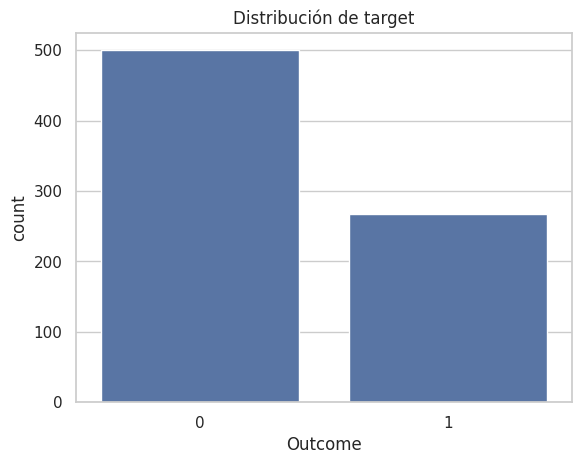

In [ ]:
# Analizar si existe desbalance
sns.countplot(x = 'Outcome', data = df)
plt.title('Distribución de target')
plt.show()

## Distribución de las variabels numéricas

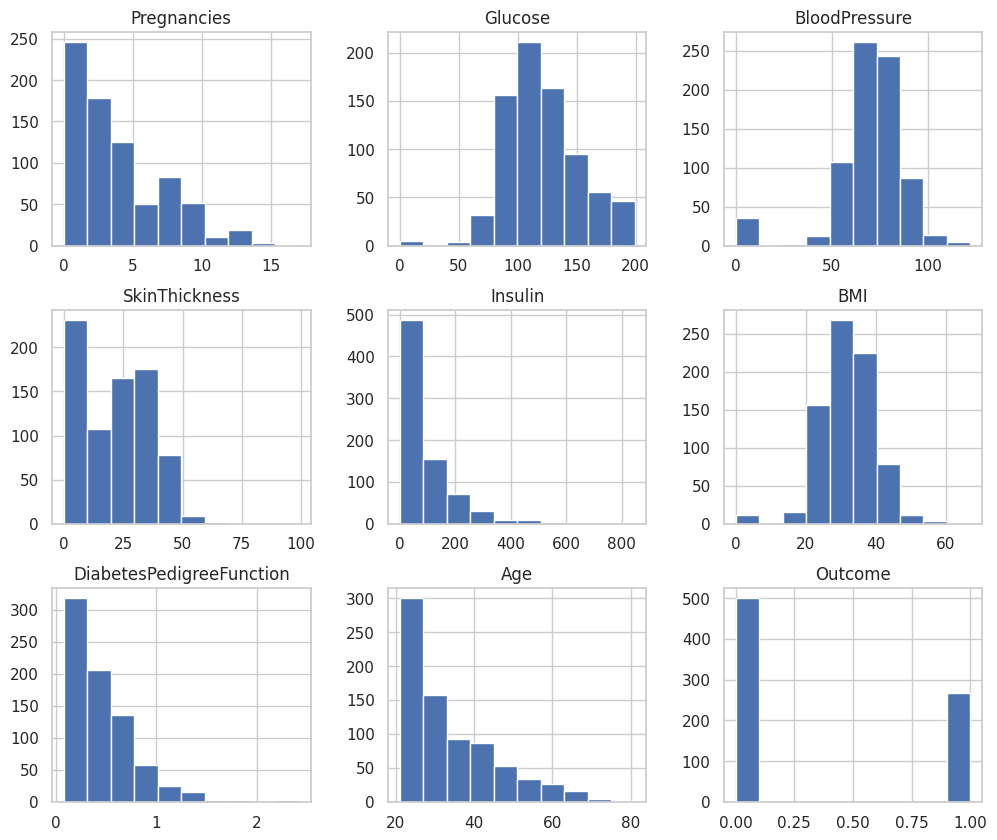

In [9]:
df.hist(figsize=(12,10))
plt.show()

## Análisis bivariado

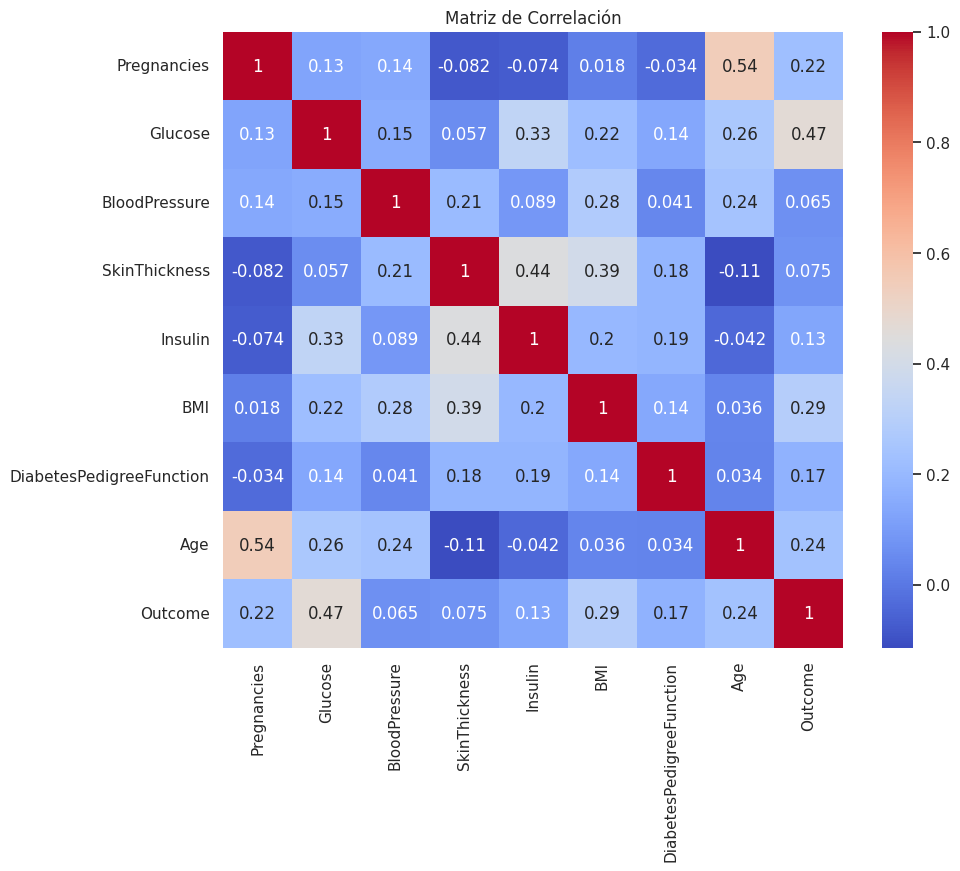

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## Variables vs target

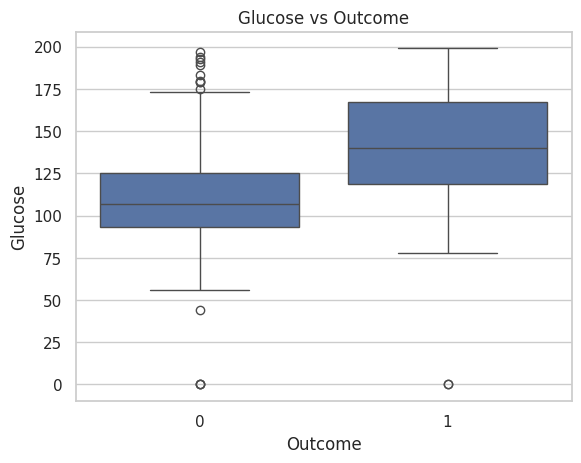

In [11]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose vs Outcome")
plt.show()

## Análisis de outliers

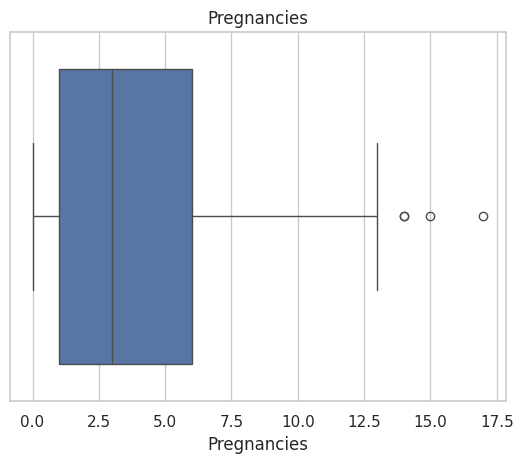

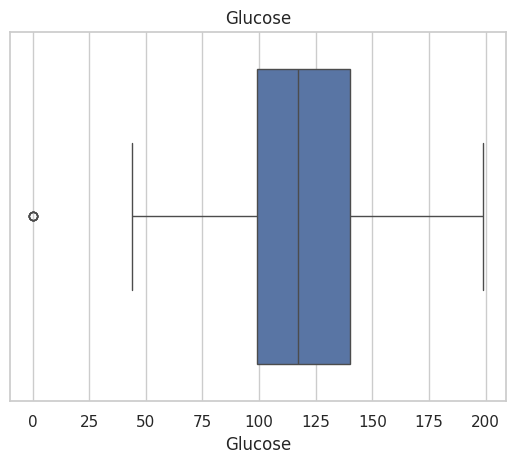

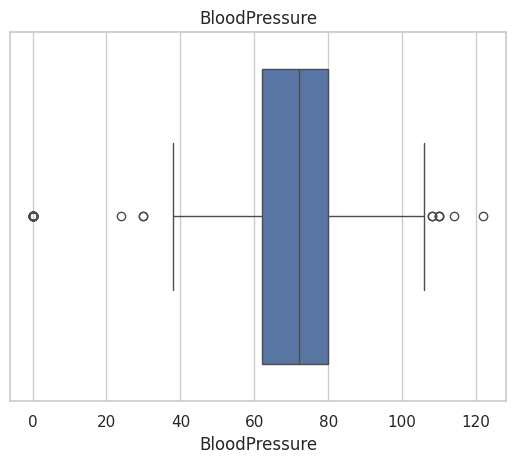

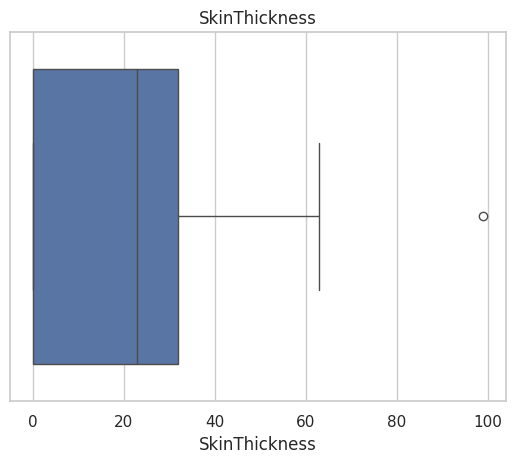

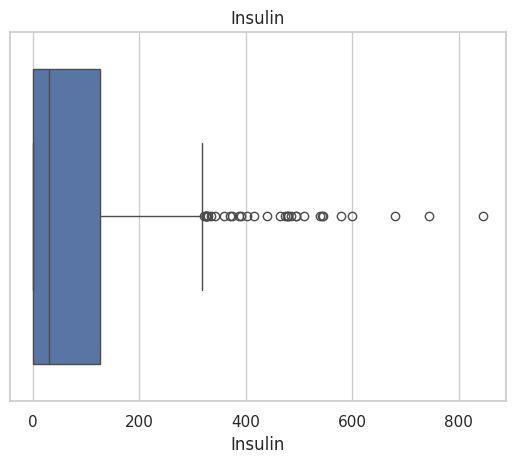

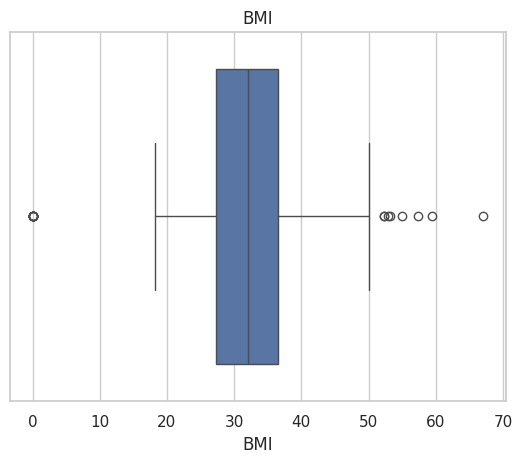

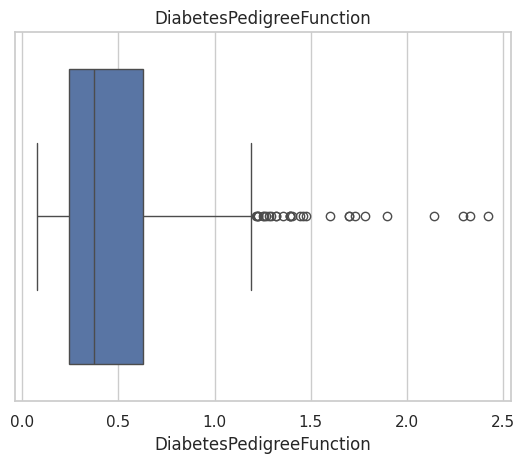

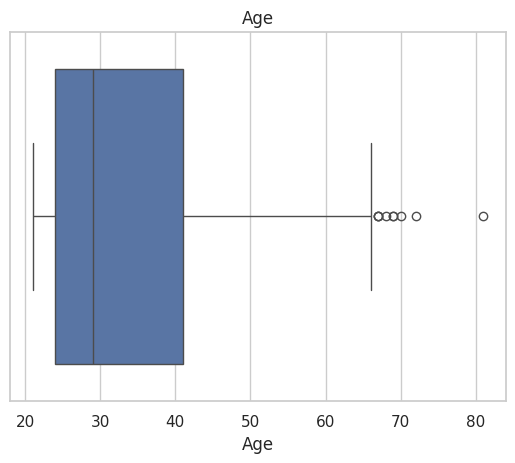

In [13]:
for col in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()